  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 44964  100 44964    0     0   223k      0 --:--:-- --:--:-- --:--:--  224k


Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

Idade estimada: 33
Gênero dominante: Woman
Emoção dominante: sad
Raça/Cor dominante: white


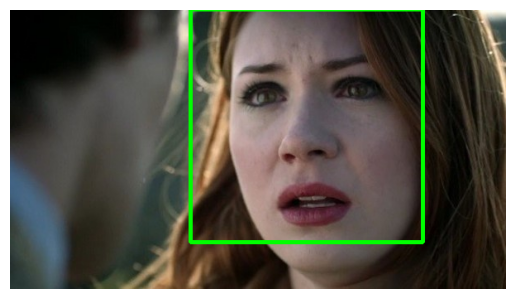

In [ ]:
# 1. Importação das bibliotecas
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

# 2. Download da imagem
import os
os.system('curl -L "https://i.imgur.com/Xw2RnXd.jpeg" -o pond.jpg')

# 3. Leitura da imagem
imagem = cv2.imread("pond.jpg")

if imagem is None:
    print("Erro ao carregar a imagem.")
    exit()

# 4. Conversão de BGR para RGB
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# 5. Análise facial com DeepFace
resultados = DeepFace.analyze(
    imagem_rgb,
    actions=['age', 'gender', 'emotion', 'race'],
    enforce_detection=False
)

# Caso o modelo retorne múltiplas faces
if isinstance(resultados, list):
    resultado = resultados[0]
else:
    resultado = resultados

# 6. Desenho do retângulo na face detectada
regiao = resultado.get('region')

if regiao:
    x, y, w, h = regiao['x'], regiao['y'], regiao['w'], regiao['h']
    cv2.rectangle(imagem_rgb, (x, y), (x + w, y + h), (0, 255, 0), 3)

# 7. Impressão dos resultados
print("===== RESULTADOS DA ANÁLISE =====")
print(f"Idade estimada: {resultado['age']}")
print(f"Gênero dominante: {resultado['dominant_gender']}")
print(f"Emoção dominante: {resultado['dominant_emotion']}")
print(f"Raça/Cor dominante: {resultado['dominant_race']}")

# 8. Exibição da imagem final
plt.imshow(imagem_rgb)
plt.axis('off')
plt.show()


# CONCLUSÃO

#Nesta atividade apliquei conceitos fundamentais de Visão Computacional utilizando as bibliotecas OpenCV, Matplotlib e DeepFace.
# Inicialmente, a imagem foi carregada do disco e convertida do padrão de cor BGR para RGB, etapa essencial para a correta exibição no Matplotlib. Em seguida, foi utilizada a função DeepFace.analyze() para realizar a análise facial, permitindo a estimativa de idade, identificação do gênero dominante, emoção predominante e raça/cor dominante.
# O experimento demonstra como técnicas de Inteligência Artificial e Visão Computacional podem ser integradas de forma prática para extrair informações relevantes a partir de imagens, evidenciando o potencial dessas tecnologias em aplicações reais.
